Оглавление
1. [Предобработка](#prep)
2. [EDA](#eda)
3. [Метрики](#metr)
4. [Разница средних](#avg_diff)
5. [Выводы](#concl)

In [618]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

<img src="https://raw.githubusercontent.com/maxzhrvl/intern_VK/main/descr.png" height="600" width="600"> 

Предобработка<a name="prep"></a>
=

Посмотрим на набор данных:

In [819]:
data = pd.read_excel('https://github.com/maxzhrvl/intern_VK/raw/main/Analytic_test.xlsx', 
                     header = 1, 
                     index_col = 0)
data.head()

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1148]:
df = data.copy(deep=True)

Проверим, есть ли в наборе данных пропуски:

In [1149]:
np.where(pd.isnull(df)) # в пятой колонке есть пропуск под индексом 68383

(array([68383], dtype=int64), array([6], dtype=int64))

In [1150]:
df.drop(index = np.where(pd.isnull(df))[0][0], inplace = True) # удалим его
df.reset_index(drop = True, inplace = True)

Cверим типы данных в колонках:

In [1151]:
df.dtypes # в трех колонках есть нетипичные типы данных

HID                       object
active_Red               float64
has_Green_id             float64
has_Black_id             float64
has_Blue_id              float64
Blue_activity_count       object
Blue_gmv_total           float64
Green_gvm_total          float64
Green_gvm_order_count     object
Black_gvm_total          float64
Black_gvm_order_count     object
Red_android              float64
Green_android            float64
Black_android            float64
Blue_android             float64
Red_apple                float64
Green_apple              float64
Black_apple              float64
Blue_apple               float64
is_msk                   float64
Red_web                  float64
Green_web                float64
Black_web                float64
Blue_web                 float64
dtype: object

In [1152]:
strange_rows = {'Blue_activity_count': [], 'Green_gvm_order_count': [], 'Black_gvm_order_count': []}

for column in list(strange_rows.keys()):
    
    count = -1
    for i in df[column]:
        count += 1
        try:
            float(i)
        except:
            strange_rows[column].append(count)

strange_rows # понимаем, что для данных индексов присутсвуют значения,
             # не соответсвующие типу float. Удалим эти строки

{'Blue_activity_count': [5745, 12746, 27359, 86827, 92308, 92395, 92448],
 'Green_gvm_order_count': [1633, 62820, 99337],
 'Black_gvm_order_count': [30040, 46736, 95336]}

In [1153]:
strange_rows = {'Blue_activity_count': [], 'Green_gvm_order_count': [], 'Black_gvm_order_count': []}

for column in list(strange_rows.keys()):
    
    count = -1
    for i in df[column]:
        count += 1
        try:
            float(i)
        except:
            strange_rows[column].append(count)
    
    df.drop(strange_rows[column], axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)

In [1154]:
df = pd.concat([df.iloc[0:, :1], df.iloc[0:, 1:].astype(float).astype(int)], axis = 1) # теперь можно преобразовать типы данных
df.dtypes

HID                      object
active_Red                int32
has_Green_id              int32
has_Black_id              int32
has_Blue_id               int32
Blue_activity_count       int32
Blue_gmv_total            int32
Green_gvm_total           int32
Green_gvm_order_count     int32
Black_gvm_total           int32
Black_gvm_order_count     int32
Red_android               int32
Green_android             int32
Black_android             int32
Blue_android              int32
Red_apple                 int32
Green_apple               int32
Black_apple               int32
Blue_apple                int32
is_msk                    int32
Red_web                   int32
Green_web                 int32
Black_web                 int32
Blue_web                  int32
dtype: object

Сверим описание данных и сам набор:

In [1155]:
df.HID.nunique() == len(df) # идентификаторы действительно не повторяются

True

In [1156]:
for i in df.columns:
    print('\033[1m' + i + '\033[0m')
    print(df[i].value_counts())
    
#   1) Судя по всему, колонка "active_Red" - это аналог колонки "has_Red_id" (не содержит ничего, кроме 0 и 1).
#      Переименуем её для соответсвия описанию датасета
#   2) "has_Green_id", "has_Black_id", "has_Blue_id" по логике не должны содержать ничего кроме 0 и 1. Заменим значения, 
#       превышающие единицу на 1

HID
00003c7fb5e57ce673f1801f3679f5c25      1
185318339809dc3b1f91cdb25625b03d25e    1
1855739b5fe07fbbe363f70db325b3b33      1
18551fe693d3706d1bc325f5525e7883b3     1
185507d7e8db8db25825bc707db3f396bb     1
                                      ..
0c3705ec105f3d6f3168bd5689b8bb37       1
0c36dfbc938fb698725193bbfd325707b0     1
0c36b39fb3d6ecc96c6f3337985d03256      1
0c36b576dd9cee36c8b9363830b25ceb3      1
325566ec18c0db59083f5f6bb1b5f93d5      1
Name: HID, Length: 99986, dtype: int64
active_Red
1    55864
0    44122
Name: active_Red, dtype: int64
has_Green_id
0    99104
1      881
2        1
Name: has_Green_id, dtype: int64
has_Black_id
0    98910
1     1074
2        2
Name: has_Black_id, dtype: int64
has_Blue_id
0    86732
1    12746
2      495
3       12
4        1
Name: has_Blue_id, dtype: int64
Blue_activity_count
0      96108
1       1368
2        625
3        425
4        288
       ...  
90         1
74         1
101        1
67         1
47         1
Name: Blue_activity_co

In [1157]:
df.rename(columns={'active_Red': 'has_Red_id'}, inplace = True)

df.rename(columns={'Green_gvm_total': 'Green_gmv_total',
                   'Green_gvm_order_count': 'Green_gmv_order_count',
                   'Black_gvm_total': 'Black_gmv_total',
                   'Black_gvm_order_count': 'Black_gmv_order_count'}, inplace = True) # gvm -> gmv

for i in ['has_Green_id', 'has_Black_id', 'has_Blue_id']:
    df[i] = df[i].apply(lambda x: 1 if x >= 1 else 0)
    
df.head()

,HID,has_Red_id,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gmv_total,Green_gmv_order_count,Black_gmv_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00006b602533083e3bebfcbff08613931,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0000736c3f76339196cb1cc759b8363b,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,00009bdcc5307b38efde8690b8bd658e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


EDA<a name="eda"></a>
=

Посмотрим, как коррелируют имеющиеся признаки:

<AxesSubplot:title={'center':'Корреляция Пирсона'}>

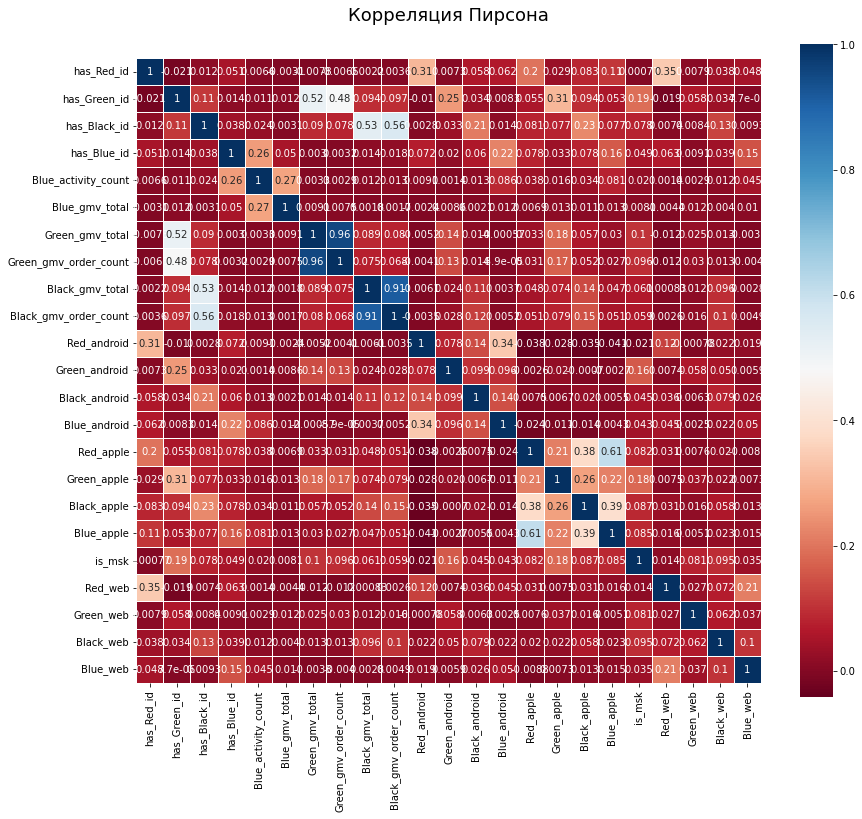

In [1158]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Корреляция Пирсона', y=1.05, size=18)

sns.heatmap(df.corr(),
            linewidths=0.5, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Можно сделать следующие выводы о наличии линейной завсисимости между признаками:
1. Компании Green и Black похожи тем, что gmv и order_count пользователей этих компаний положительно связаны. Разумеется,
чем больше успешных заказов совершает пользователь, тем больше его gmv.
2. В обоих компаниях gmv и order_count положительно зависит от наличия зарегестрированного аккаунта, в отличие от компании Blue: возможно, это объясняется тем, что для совершения успешного заказа в компании Blue не требуется иметь зарегестрированный аккаунт.
3. В то же время Gmv компании Blue не сильно, но зависит от количества активных действий пользователя (которое в виду отсутствия количества заказов выступает его неким аналогом). В свою очередь количество активнз действий положительно связано с
наличием аккаунта у пользователя (как и в компаниях Green и Black).
4. Заметно также, что пользователи c платформой Apple, чаще имеют у себя установленное приложение других компаний. В случае платформы Android аналогичный вывод можно сделать только для компаний Red и Blue.

Посмотрим, как распределены количество успешных заказов и суммарный gmv пользователей компаний Green и Black, а также
количество активных действий и суммарный gmv пользователей компании Blue:

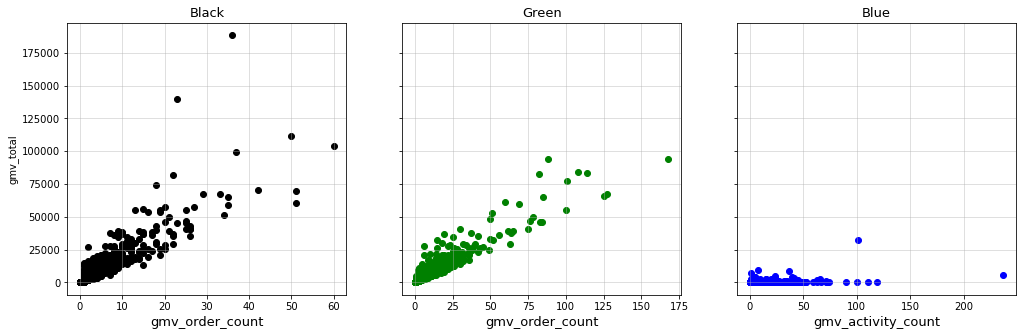

In [1159]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5), sharey = 'row')

ax[0].scatter(df.Black_gmv_order_count, df.Black_gmv_total, color = 'black')
ax[0].set_xlabel('gmv_order_count', fontsize = 13)
ax[0].set_title('Black', fontsize = 13)
ax[0].grid(True, alpha = 0.5)

ax[1].scatter(df.Green_gmv_order_count, df.Green_gmv_total, color = 'green')
ax[1].set_xlabel('gmv_order_count', fontsize = 13)
ax[1].set_title('Green', fontsize = 13)
ax[1].grid(True, alpha = 0.5)

ax[2].scatter(df.Blue_activity_count, df.Blue_gmv_total, color = 'blue')
ax[2].set_xlabel('gmv_activity_count', fontsize = 13)
ax[2].set_title('Blue', fontsize = 13)
ax[2].grid(True, alpha = 0.5)

ax[0].set_ylabel('gmv_total')

plt.show()

Графики компаний Black и Green подтверждают наличие линейной зависимости между количеством заказов и gmv. Более того, становится понятно, что основная масса пользователей совершает мало заказов (0-25) на небольшую сумму (0-35 тыс.). Важно отметить, что пользователи компании Black заказывают меньше, но на большую сумму, при том что пользователи Green наоборот, делают больше заказов, но с меньшим чеком (пускай разница и не велика). График компании Blue примечателен тем, что большое количество их пользователей совершает какие-либо активные действия в сервисе, но при этом имеют низкий gmv (то есть пользуются сервисом, но при этом мало покупают)

Посмотрим на использование платформ, которые установили у себя пользователи четырех компаний:

In [1160]:
dct = {
      'Android':
      [df.Red_android.sum(), df.Black_android.sum(), df.Green_android.sum(), df.Blue_android.sum()],
      'Apple':
      [df.Red_apple.sum(), df.Black_apple.sum(), df.Green_apple.sum(), df.Blue_apple.sum()],
      'PC':
      [df.Red_web.sum(), df.Black_web.sum(), df.Green_web.sum(), df.Blue_web.sum()]}

platform_df = pd.DataFrame(dct, index = ['Red', 'Black', 'Green', 'Blue'])

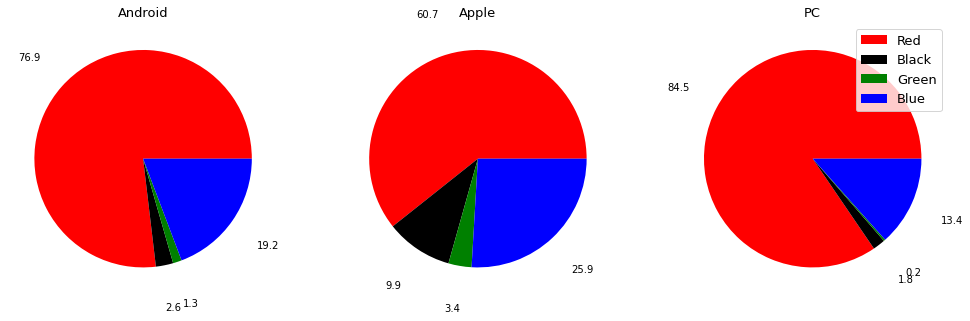

In [1161]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5))

ax[0].pie(platform_df.Android, labels = platform_df.index, labeldistance = None, autopct='%.1f', pctdistance=1.4,
       colors = ['red', 'black', 'green', 'blue'])
ax[0].set_title('Android', fontsize = 13)

ax[1].pie(platform_df.Apple, labels = platform_df.index, labeldistance = None, autopct='%.1f', pctdistance=1.4,
       colors = ['red', 'black', 'green', 'blue'])
ax[1].set_title('Apple', fontsize = 13)

ax[2].pie(platform_df.PC, labels = platform_df.index, labeldistance = None, autopct='%.1f', pctdistance=1.4,
       colors = ['red', 'black', 'green', 'blue'])
ax[2].set_title('PC', fontsize = 13)

plt.legend(fontsize = 13)
plt.show()

Если считать, что на рынке всего 4 компании и у каждой из них есть по 3 версии приложения на разные платформы, то:
1. Безусловным лидером по количеству установленных приложений (на любой платформе) является компания Red. В то же время у данной компании больше всего зарегестрированных аккаунтов в целом (ближайший конкурент - компания Blue, имеет в 4 раза меньше зарегестрированных аккаунтов), поэтому данный показатель не свидетельствует однозначно об абсолютном лидерстве Red по использованию приложения на всех платформах)

In [1162]:
df[['has_Red_id','has_Green_id','has_Black_id','has_Blue_id']].sum()

has_Red_id      55864
has_Green_id      882
has_Black_id     1076
has_Blue_id     13254
dtype: int64

2. Вторую по величине долю имеет компания Blue, которая также не очень похожа на своих конкурентов. Тем не менне, достаточно большое количество активных действий пользователей данной компаний может быть вызвано распространенностью приложения на всех представленных платформах.

3. Две компании, которые мы сравнивали между собой в предыдущем пункте - Green и Black, делят между собой тертье и четвертое места, причем на всех платформах лидирует Black. Возможно, большее распространение приложения Black на всех платформах находит отражение в более высоком gmv_total данной компании по сравнению с Green.

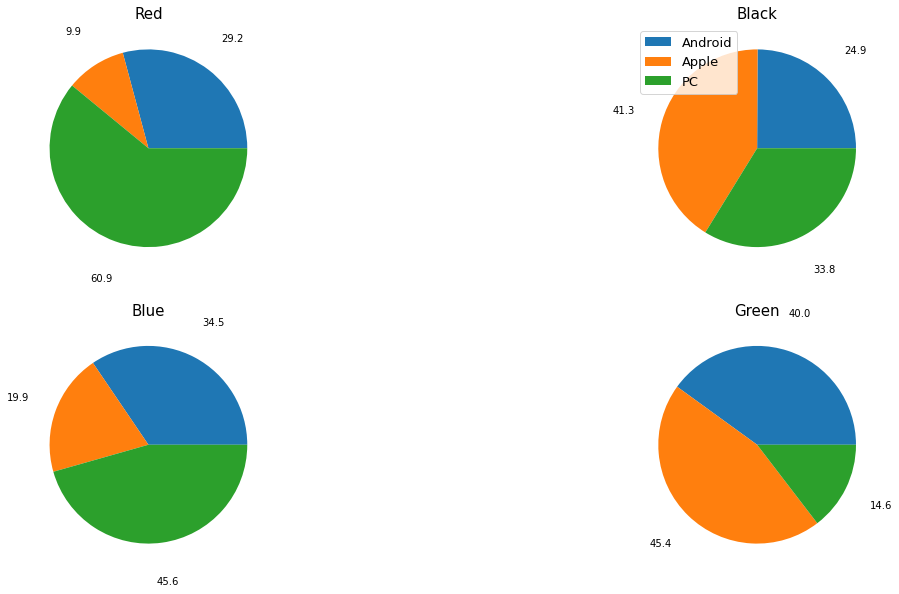

In [1163]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0][0].pie(platform_df.T.Red, labels = platform_df.T.index, labeldistance = None, autopct='%.1f', pctdistance=1.4)
ax[0][0].set_title('Red', fontsize = 15)

ax[0][1].pie(platform_df.T.Black, labels = platform_df.T.index, labeldistance = None, autopct='%.1f', pctdistance=1.4)
ax[0][1].set_title('Black', fontsize = 15)

ax[1][0].pie(platform_df.T.Blue, labels = platform_df.T.index, labeldistance = None, autopct='%.1f', pctdistance=1.4)
ax[1][0].set_title('Blue', fontsize = 15)

ax[1][1].pie(platform_df.T.Green, labels = platform_df.T.index, labeldistance = None, autopct='%.1f', pctdistance=1.4)
ax[1][1].set_title('Green', fontsize = 15)

ax[0][1].legend(loc='upper left', fontsize = 13)
plt.show()

1. Рассматривая распределение пользователей по платформам внутри компании (без учета того, что у пользователя может быть установлено приложение сразу на нескольких платформах), можно сделать вывод о том, что каждая компания делает упор как правило на 1 (максимум 2) платформы. Причем сама платформа или их комбинация может быть разной: как мобильной, так и десктопной.
2. Вновь можно наблюдать разбиение наших компаний на 2 "лагеря": Green и Black чаще работают с пользователями на платформе Apple, а Red и Blue - на PC.
3. Компания Red, которая лидирует по использованию всех платформ, поимо прочего является единственной, у которой больше всего пользователей используют приложение на PC, нежели чем на смартфоне (Apple / Android).

Посмотрим на распределение среднего gmv_total в зависимости от is_msk:

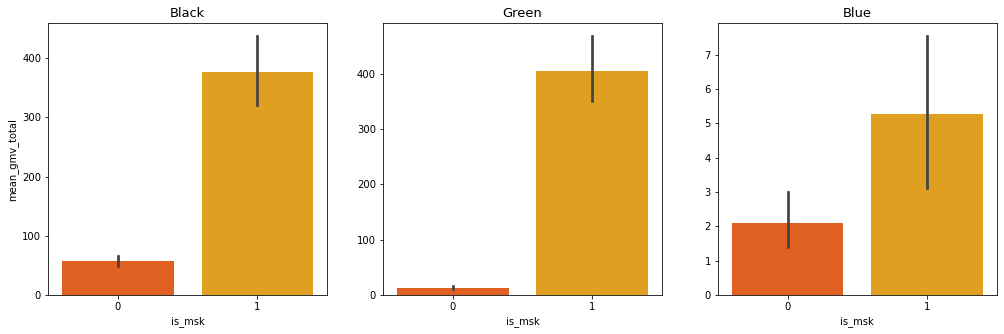

In [1164]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5))

sns.barplot(x='is_msk', y='Black_gmv_total', data=df, palette='autumn', ax=ax[0])
ax[0].set_title('Black', fontsize = 13)

sns.barplot(x='is_msk', y='Green_gmv_total', data=df, palette='autumn', ax=ax[1])
ax[1].set_title('Green', fontsize = 13)

sns.barplot(x='is_msk', y='Blue_gmv_total', data=df, palette='autumn', ax=ax[2])
ax[2].set_title('Blue', fontsize = 13)

ax[0].set_ylabel('mean_gmv_total')
ax[1].set(ylabel=None)
ax[2].set(ylabel=None)

plt.show()

1. Заметно, что средний gmv_total пользователей, которые территориально не находятся в Москве - меньше. Это может свидетельствовать о том, что для всех трех компаний больше всего gmv генерируют пользователи из Москвы.
2. В то же время в выборке присутсвуют аномально большие значения gmv, которые могут искажать картину, поэтому в будущем мы посмотрим на аналогичные графики, но без выбросов.
3. Доверительные интервалы для среднего по компаниям Black и Green визуально не пересекаются, что скорее свидетельствует о значимой разнице в среднем gmv между пользователями из Москвы и не из Москвы (в отличие от компании Green).

Метрики<a name="metr"></a>
=

Посчитаем AOV (Average Order Value) для трех компаний: Black, Green и Blue (для последней компании допустим, что если у пользователя gmv_total > 0, то он совершил 1 заказ). В будущем gmv_order_count для Blue (которого изначально нет в таблице) также понадобится для расчета другой метрики.

In [1165]:
df['Blue_gmv_order_count'] = df['Blue_gmv_total'].apply(lambda x: 1 if x >= 1 else 0)

dct = {'AOV':[], 'ARPU':[]}

company = ['Black', 'Green', 'Blue']

for c in company:
    dct['AOV'].append(df[c + '_gmv_total'].sum() / df[c + '_gmv_order_count'].sum())
    dct['ARPU'].append(df[c + '_gmv_total'].sum() / sum(df[c + '_gmv_order_count'] > 0))

metrics = pd.DataFrame(dct, index = company)
metrics

,AOV,ARPU
Black,2159.229190,8799.460967
Green,777.225253,6783.537415
Blue,546.884444,546.884444


1. Компания Black имеет наилучшие показатели AOV и ARPU из рассматриваемой тройки. Возможно, на такие высокие значения метрики повлияли своего рода аномальные значения gmv_total, но так или иначе компания Black получает хороший доход (после учета комиссии) с одного заказа, ровно как и выручку с одного пользователя.
2. Показатели компании Green не такие плохие, как могут показаться. Среднее количество заказов данной компании, как мы заметили ранее, больше, чем у компании Black, поэтому они могут себе позволить получать меньше gmv с одного заказа. Средний доход с одного пользователя также сравним в ARPU компании Black.
3. Таким образом, используя разные стратегии, обе компании демонстриуют примерно одинаковые покзатели выручки (необходимо также учесть комиссию). Однако, компания Blue отстает по AOV от Black и Green: не зная истинные значения количества успешных заказов трудно что-то сказать (тем более AOV = ARPU из-за искусственного синтеза столбца количества заказов). Очевидно одно: её total_gmv существенно ниже своих конкурентов, а значит обе метрики будут также иметь меньшие значения по сравнению с конкурентами.

Посчитаем конверсию CR для компании Blue: условимся, что количество визитов - это количество пользователей, у которых avtivity_count > 0, а количество целевых визитов - это количество пользователей, у которых gmv_order_count > 0.

In [1166]:
CR = round(sum(df['Blue_gmv_order_count'] > 0) / sum(df['Blue_activity_count'] > 0) * 100, 2)
print(f'CR компании Blue равен {CR}%')

CR компании Blue равен 11.6%


Нельзя однозначно сказать, хорошее ли значение конверсии демонстрирует компания Blue. По-хорошему, нужно отследить её в динамике и сделать выводы. Также нужно учесть, чем занимается данная компания, насколько много у неё активных пользователей и насколько часто мы ожидаем целевое действие от пользователя в зависимости от нашей стратегии.

Посчитаем Концентрацию GMV: условимся, что самые активные пользователи - это те, кто:
* В компании Black совершает от 20 заказов и его gmv >= 35k
* В компании Green совершает от 45 заказов и его gmv >= 30k
* В компании Blue совершает 1 заказ (искусственно создали) и его gmv >= 4k

In [1167]:
dct = {'GMV_conc':[]}

company = ['Black', 'Green', 'Blue']

for c in company:
    
    if c == 'Black':
        gmv_constr = 35000
        orders_constr = 20
    elif c == 'Green':
        gmv_constr = 30000
        orders_constr = 45
    else:
        gmv_constr = 4000
        orders_constr = 1
        
    dct['GMV_conc'].append(df[(df[c + '_gmv_total'] >= gmv_constr) & 
                              (df[c + '_gmv_order_count'] >= orders_constr)][c + '_gmv_total'].sum() /
                           df[c + '_gmv_total'].sum())

metrics_ = pd.DataFrame(dct, index = company)
metrics_

,GMV_conc
Black,0.210354
Green,0.240492
Blue,0.295094


Учитывая, что деление на активных пользователей может варьироваться, можно сделать вывод о том, что ни для одной из рассматриваемых компаний не существует серьезного риска потери ликвидности. Крупные покупатели пускай и составляют от 20 до 30 процентов gmv_total данных компаний (что достаточно естественно), серьезной опасности в случае их ухода - нет. Таким образом, компании Black, Green и Blue деверсифицируют свои риски должным образом.

Разница средних<a name="avg_diff"></a>
=

Cохраним в отдельные датасеты данные без аномалий для каждой из компаний:

In [1168]:
df_Black = df.copy(deep=True)
df_Green = df.copy(deep=True)
df_Blue = df.copy(deep=True)

q99_Black = df_Black.Black_gmv_total.quantile(0.99)
df_Black = df_Black[df_Black.Black_gmv_total < q99_Black]

q99_Green = df_Green.Green_gmv_total.quantile(0.995)
df_Green = df_Green[df_Green.Green_gmv_total < q99_Green]

q99_Blue = df_Blue.Blue_gmv_total.quantile(0.996)
df_Blue = df_Blue[df_Blue.Blue_gmv_total < q99_Blue]

Посмотрим на аналогичные графики для среднего:

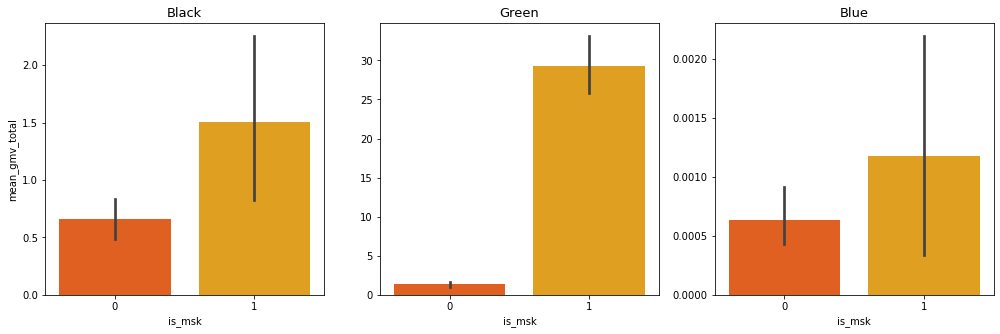

In [1169]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5))

sns.barplot(x='is_msk', y='Black_gmv_total', data=df_Black, palette='autumn', ax=ax[0])
ax[0].set_title('Black', fontsize = 13)

sns.barplot(x='is_msk', y='Green_gmv_total', data=df_Green, palette='autumn', ax=ax[1])
ax[1].set_title('Green', fontsize = 13)

sns.barplot(x='is_msk', y='Blue_gmv_total', data=df_Blue, palette='autumn', ax=ax[2])
ax[2].set_title('Blue', fontsize = 13)

ax[0].set_ylabel('mean_gmv_total')
ax[1].set(ylabel=None)
ax[2].set(ylabel=None)

plt.show()

Помимо значительного снижения среднего gmv_total (что свидетельствует о том, что меньше 1% даннных, который мы удалили, вносил существуенный вклад в порядок значений gmv), наблюдаем также, что средние по компании Black уже не разнятся так сильно и возможно пересечение доверительных интервалов между двумя группами пользователей. Построим ДИ для разности средних по всем трем компаниям:

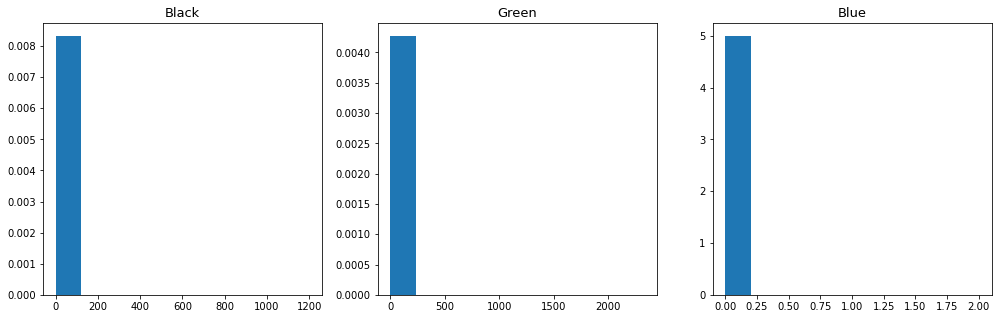

In [1170]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5))

ax[0].hist(df_Black.Black_gmv_total, bins = 10, density = True)
ax[0].set_title('Black', fontsize = 13)

ax[1].hist(df_Green.Green_gmv_total, bins = 10, density = True)
ax[1].set_title('Green', fontsize = 13)

ax[2].hist(df_Blue.Blue_gmv_total, bins = 10, density = True)
ax[2].set_title('Blue', fontsize = 13)

plt.show()

Удалив выбросы из выборки, мы понимаем, что распределение total_gmv не похоже на нормальное. Тем не менее, для того, что применять ЦПТ, мы предполагаем, что ни одна случайная величина из выборки не выделяется на фоне остальных и размер выборки достаточно большой. Обе предпосылки выполняются. Воспользуемся формулой для построения доверительного интервала для разницы средних:

$$
\left(\hat \mu_x - \hat \mu_y\right)  \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat{\sigma_x}^2}{n} + \frac{\hat{\sigma_y}^2}{m}} 
$$

In [1179]:
alpha = 0.05

z = stats.norm.ppf(1 - alpha/2)

df_c = [df_Black, df_Green, df_Blue]

company = ['Black', 'Green', 'Blue']

dct = {'mean_x': [], 'mean_y': [], 'diff': [], 'std_x': [], 'std_y': [], 'n_x': [], 'n_y': [], 'lower': [], 'upper': []}

for i in range(3):
    
    mean_x = df_c[i].groupby(['is_msk'])[company[i] + '_gmv_total'].mean()[0]
    mean_y = df_c[i].groupby(['is_msk'])[company[i] + '_gmv_total'].mean()[1]
    
    diff = mean_x - mean_y
    
    std_x = df_c[i].groupby(['is_msk'])[company[i] + '_gmv_total'].std()[0]
    std_y = df_c[i].groupby(['is_msk'])[company[i] + '_gmv_total'].std()[1]
    
    n_x = df_c[i].groupby(['is_msk'])[company[i] + '_gmv_total'].count()[0]
    n_y = df_c[i].groupby(['is_msk'])[company[i] + '_gmv_total'].count()[1]

    lower = diff - z * np.sqrt(std_x**2 / n_x + std_y**2 / n_y)
    upper = diff + z * np.sqrt(std_x**2 / n_x + std_y**2 / n_y)

    dct['mean_x'].append(mean_x)
    dct['mean_y'].append(mean_y)
    dct['diff'].append(diff)
    dct['std_x'].append(mean_x)
    dct['std_y'].append(mean_y)
    dct['n_x'].append(n_x)
    dct['n_y'].append(n_y)
    dct['lower'].append(lower)
    dct['upper'].append(upper)

CI_df = pd.DataFrame(dct, index = company)
CI_df

,mean_x,mean_y,diff,std_x,std_y,n_x,n_y,lower,upper
Black,0.659744,1.506496,-0.846752,0.659744,1.506496,87440,11546,-1.575625,-0.117879
Green,1.366764,29.262628,-27.895864,1.366764,29.262628,87964,11522,-31.693983,-24.097746
Blue,0.000638,0.001182,-0.000544,0.000638,0.001182,87731,11840,-0.001451,0.000363


1. В доверительный интервал для компаний Black и Green не входит 0, а значит разница средних значений gmv по двум группам пользователей может иметь место. Знаки границ ДИ демонстрируют тот факт, что средий gmv тех, кто находится в Москве в среднем выше, чем тех, кто находится за пределами города.
2. В ДИ для компании Blue входит 0, а значит разница в средних значениях может быть несущественна, что говорит нам о том, что пользователи компании Blue не сильно различаются по среднему gmv между двумя группами пользователей.

Выводы<a name="concl"></a>
=

По имеющимся данным можно сделать следующие выводы:
1. Компании делятся на две группы с похожими характеристиками по представленным параметрам
2. В подгруппах существуют определенные взаимосвязи, которые нам удалось выявить
3. Скорее всего разбиение обусловлено стратегиями, которые используют компании
4. Метрики компаний сравнимы между собой и не вызывают опасений
5. Неестественных зависимостей обнаружено не было